In [ ]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

x = symbols('x')

# Завдання 1

Виконай диференціювання функції та знайди значення похідних $у$ точках $x=1$ і $x=−\frac{1}{2}$. Розв’яжи програмно та аналітично.

## Завдання 1.1

$$
f(x) = \frac{x^3}{3} + \frac{x^2}{2} - 2x
$$

ОДЗ функції:
$$
x \in (-\infty; +\infty)
$$

Визначення похідної:

$$
f'(x) = (\frac{x^3}{3} + \frac{x^2}{2} - 2x)' = \frac{1}{3} \cdot 3x^2 + \frac{1}{2} \cdot 2x - 2 = x^2 + x - 2
$$

$$
f'(1) = 0
$$

$$
f'(-\frac{1}{2}) = -2\frac{1}{4}
$$

In [ ]:
y = (x ** 3) / 3 + (x ** 2) / 2 - 2 * x
yprime = y.diff(x)

print(yprime)
print(lambdify(x, yprime)(1))
print(lambdify(x, yprime)(-0.5))

x**2 + x - 2
0
-2.25


## Завдання 1.2

$$
f(x) = \sqrt{x^2 + 1}
$$

ОДЗ функції:

$$
x^2 + 1 \geq 0
$$

$$
x^2 \geq -1
$$

$$
x \in (-\infty; +\infty)
$$

Визначення похідної:

$$
f'(x) = (\sqrt{x^2 + 1})' = ((x^2 + 1)^{\frac{1}{2}})' = \frac{1}{2}\cdot (x^2 + 1)^{-\frac{1}{2}} \cdot (x^2 + 1)' = \frac{2x}{2\sqrt{x^2 + 1}} = \frac{x}{\sqrt{x^2 + 1}}
$$

$$
f'(1) = \frac{1}{\sqrt{2}}
$$

$$
f'(-\frac{1}{2}) = -\frac{1}{2\sqrt{\frac{5}{4}}} = -\frac{1}{\sqrt{5}}
$$

In [ ]:
y = (x ** 2 + 1) ** 0.5
yprime = y.diff(x)

print(yprime)
print(lambdify(x, yprime)(1))
print(lambdify(x, yprime)(-0.5))

1.0*x/(x**2 + 1)**0.5
0.7071067811865476
-0.4472135954999579


## Завдання 1.3

$$
f(x) = \frac{1}{\sqrt{x^2 + 1}}
$$

ОДЗ функції:

| $\sqrt{x^2 + 1} \neq 0$ | $x^2 + 1 \geq 0$ |
| :---: | :---: |
| $x^2 + 1 \neq 0$ | $x^2 \geq -1$ |
| $x^2 \neq -1$ | $x \in (-\infty; +\infty)$ |
| $x \in (-\infty; +\infty)$ | |

$$
x \in (-\infty; +\infty)
$$

Визначення похідної:

$$
f'(x) = (\frac{1}{\sqrt{x^2 + 1}})' = ((x^2 + 1)^{-\frac{1}{2}})' = -\frac{1}{2} \cdot (x^2 + 1)^{-\frac{3}{2}} \cdot (x^2 + 1)' = - \frac{2x}{2\sqrt{(x^2 + 1)^3}} = - \frac{x}{\sqrt{(x^2 + 1)^3}}
$$

$$
f'(1) = -\frac{1}{2\sqrt{2}}
$$

$$
f'(-\frac{1}{2}) = \frac{1}{2\sqrt{\frac{5}{4}^3}} = \frac{4}{5\sqrt{5}}
$$

In [ ]:
y = 1 / ((x ** 2 + 1) ** 0.5)
yprime = y.diff(x)

print(yprime)
print(lambdify(x, yprime)(1))
print(lambdify(x, yprime)(-0.5))

-1.0*x/(x**2 + 1)**1.5
-0.3535533905932738
0.35777087639996635


# Завдання 2

Виконай диференціювання функції та знайди точку максимуму. Візуалізуй функцію, її похідну та точку максимуму. Розв’яжи лише програмно.

$$
y = -3x^2 + 30x
$$

Похідна: 30 - 6*x
Точка екстремуму: (5, 75)


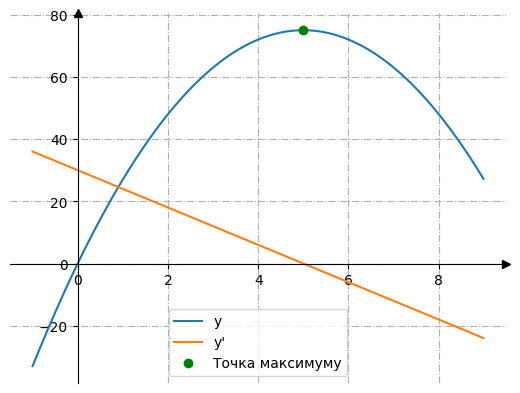

In [ ]:
# спочатку диференцюємо функцію

y = -3 * x ** 2 + 30 * x
yprime = y.diff(x)

print(f"Похідна: {yprime}")

# знайдемо точки максимуму
# це точки, де значення похідної дорівнює 0
# так як графік похідної - лінійна функція, то вона перетне вісь абсцис лише один раз, а тому в нас буде єдина точка екстремуму
# чому це буде саме точка максимуму? тому що в нас парна функція, гілки якої дивляться вниз (бо коефіцієнт при x^2 відʼємний)

x_max = solve(yprime)[0]
y_max = lambdify(x, y)(x_max)

print(f"Точка екстремуму: ({x_max}, {y_max})")

# підготуємо площину

fig, ax = plt.subplots()
ax.spines[["left", "bottom"]].set_position(("data", 0))
ax.spines[["top", "right"]].set_visible(False)
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.grid(True, linestyle='-.')

# тепер візуалізуємо функцію, її похідну і точку максимуму на одному графіку

x_var = []
y_solution = []
yprime_solution = []

for i in range(1000):
    x_i = (i - 100) * 0.01
    x_var.append(x_i)
    y_solution.append(y.subs(x, x_i))
    yprime_solution.append(yprime.subs(x, x_i))

ax.plot(x_var, y_solution, label="y")
ax.plot(x_var, yprime_solution, label="y'")
ax.plot(x_max, y_max, 'go', label="Точка максимуму")

plt.legend()
plt.show()
